In [1]:
import os
import sys
import torch
from timeit import default_timer as timer
from datetime import timedelta

BASE_DIR = os.path.dirname('./')
ROOT_DIR = os.path.dirname(BASE_DIR)
sys.path.append(ROOT_DIR)

import yaml

from lib.common.helpers.dataloader_helper import build_dataloader
from lib.common.helpers.model_helper import build_model
from lib.common.helpers.visualization_helper import visualization
from lib.common.helpers.print_helper import PrintHelper

In [2]:
mode = 'test' # test, train
config = 'configs/kitti-dtr.yaml'
from lib.monoDTR.printer import Printer

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# load cfg
assert (os.path.exists(config))
cfg = yaml.load(open(config, 'r'), Loader=yaml.Loader)
  
#  build dataloader
dataset = build_dataloader(cfg['dataset'], mode)

# build model
model = build_model(cfg['model'])

printHelper = PrintHelper(dataset)
printer = Printer(cfg['model'], model)

Using device: cuda


In [3]:
idx = 0


2
[['Car', 0, 0, 1.8176725, 328.06464, 203.03206, 436.57047, 272.25006, 1.3952215, 1.5336624, 3.8045652, -5.364572, 2.1585824, 17.311012, 1.5204438, 0.9998996], ['Car', 0, 0, 1.7599015, 403.57242, 198.13652, 479.42035, 252.5928, 1.4540668, 1.555326, 3.6885943, -5.113682, 2.2610502, 22.080814, 1.5349979, 0.99965477], ['Car', 0, 0, -0.39196813, 776.92725, 175.54984, 1109.0219, 289.94638, 1.5171605, 1.7009795, 4.1109166, 4.6769238, 1.5544096, 10.598246, 0.028520077, 0.99902153], ['Car', 0, 0, 1.7549589, 443.04114, 194.49562, 507.18454, 235.7773, 1.3693837, 1.579181, 3.982946, -5.0176573, 2.2086167, 27.102396, 1.5741134, 0.9974485], ['Car', 0, 0, 2.3286033, 944.61694, 174.0339, 1222.2223, 375.0, 1.5346346, 1.6560156, 3.9366856, 4.8514585, 1.5316103, 5.7422085, 3.0363991, 0.9584655], ['Car', 0, 0, 1.7356613, 463.60144, 194.54977, 516.0011, 228.3004, 1.3069452, 1.5400032, 3.6733303, -5.2067466, 2.278012, 31.431353, 1.5734233, 0.9541474]]
0:00:00.080086


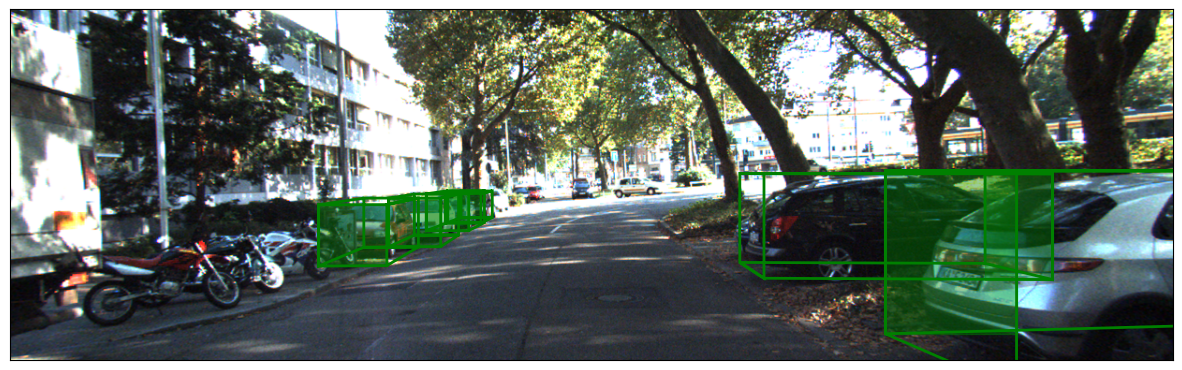

In [6]:
print(idx)

for x in range(1):
    img, calibs = printHelper.getPrintables(idx)

    torch.cuda.synchronize() # Wait for all kernels in all streams on a CUDA device to complete.
    start_time = timer()
    
    preds = printer.print(img, calibs)
    print(preds)

    torch.cuda.synchronize() # Wait for all kernels in all streams on a CUDA device to complete.
    end_time = timer()
    print(timedelta(seconds=end_time - start_time))
    
    visualization(img, calibs, preds, False)
    idx = idx +1